## Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
plt.style.use('seaborn')

### Marchencho Pastur and Other functions

In [2]:
def mpPDF(var,q,pts):
    # Marcenko-Pastur pdf
    # q=T/N
    eMin,eMax=var*(1-(1./q)**.5)**2,var*(1+(1./q)**.5)**2
    eVal=np.linspace(eMin,eMax,pts)
    pdf=q/(2*np.pi*var*eVal)*((eMax-eVal)*(eVal-eMin))**.5
    pdf=pd.Series(pdf.flatten(),index=eVal.flatten())
    return pdf

def getPCA(matrix):
    # Get eVal,eVec from a Hermitian matrix
    eVal,eVec=np.linalg.eigh(matrix)
    indices=eVal.argsort()[::-1] # arguments for sorting eVal desc
    eVal,eVec=eVal[indices],eVec[:,indices]
    eVal=np.diagflat(eVal)
    return eVal,eVec

def fitKDE(obs,bWidth=.25,kernel='gaussian',x=None):
    # Fit kernel to a series of obs, and derive the prob of obs
    # x is the array of values on which the fit KDE will be evaluated
    if len(obs.shape)==1:
        obs=obs.reshape(-1,1)
    kde=KernelDensity(kernel=kernel,bandwidth=bWidth).fit(obs)
    if x is None:
        x=np.unique(obs).reshape(-1,1)
    if len(x.shape)==1:
        x=x.reshape(-1,1)
    logProb=kde.score_samples(x) # log(density)
    pdf=pd.Series(np.exp(logProb),index=x.flatten())
    return pdf


## Import CC correlation Data

In [3]:
corr_mat = pd.read_csv('corr_matrix_jenna.csv')

In [4]:
corr_mat = corr_mat.iloc[:, 1:]

In [5]:
print("number of CCs")
len(corr_mat.columns)

number of CCs


146

In [6]:
corr_mat

,BTC,ETH,XRP,USDT,BCH,BSV,LTC,EOS,BNB,XTZ,...,BNT,LOKI,PPT,IOTX,YOU,EDC,XMX,R,FTM,WINK
0,1.000000,0.828023,0.708811,0.230462,0.793383,0.514932,0.739252,0.748623,0.579444,0.484131,...,0.739242,0.384780,0.410056,0.462108,0.200833,0.243157,0.269757,0.289082,0.446247,0.012931
1,0.828023,1.000000,0.809373,0.167425,0.813135,0.557979,0.825037,0.863855,0.645828,0.508095,...,0.887088,0.368124,0.486960,0.544173,0.217886,0.246854,0.287253,0.314076,0.523428,0.105188
2,0.708811,0.809373,1.000000,0.161208,0.723930,0.525666,0.736752,0.776160,0.541155,0.523043,...,0.740749,0.340316,0.465338,0.545822,0.176974,0.203045,0.204837,0.254176,0.452100,0.022297
3,0.230462,0.167425,0.161208,1.000000,0.155791,0.133748,0.155450,0.155750,0.119897,0.187393,...,0.135655,0.095342,0.129481,0.136492,0.075497,0.109761,0.009731,0.067724,0.117066,0.025496
4,0.793383,0.813135,0.723930,0.155791,1.000000,0.579533,0.810831,0.820908,0.565801,0.415039,...,0.717876,0.364652,0.445721,0.537654,0.182425,0.203736,0.274921,0.343160,0.450771,0.068361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,0.243157,0.246854,0.203045,0.109761,0.203736,0.154249,0.226645,0.262564,0.268038,0.130240,...,0.212653,0.200502,0.106191,0.141038,0.059712,1.000000,0.128921,0.051355,0.152673,0.215506
142,0.269757,0.287253,0.204837,0.009731,0.274921,0.176330,0.218049,0.223524,0.208150,0.182968,...,0.249081,0.104809,0.091314,0.117935,0.044836,0.128921,1.000000,0.054379,0.218502,0.006347
143,0.289082,0.314076,0.254176,0.067724,0.343160,0.254861,0.360682,0.306555,0.219988,0.162581,...,0.272194,0.053509,0.193115,0.211529,0.158907,0.051355,0.054379,1.000000,0.268827,0.039687
144,0.446247,0.523428,0.452100,0.117066,0.450771,0.361361,0.521576,0.505816,0.456896,0.341754,...,0.494529,0.193495,0.347206,0.407709,0.132923,0.152673,0.218502,0.268827,1.000000,0.116134


## Section 1:
    - Working here randomized examples

### Plot Marchenko Pastur PDF and Fit Kernel Density Estimation to get probability of observations

In [7]:
x=np.random.normal(size=(10000,1000))
eVal0,eVec0=getPCA(np.corrcoef(x,rowvar=0))
## Replace with CC matrix here to work with CCs matrix
# eVal0,eVec0=getPCA(corr_mat)
pdf0=mpPDF(1.,q=x.shape[0]/float(x.shape[1]),pts=1000)
pdf1=fitKDE(np.diag(eVal0),bWidth=.01) # empirical pdf

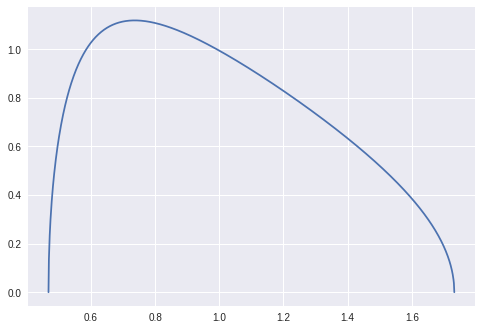

In [10]:
# mpPDF
pdf0.plot()

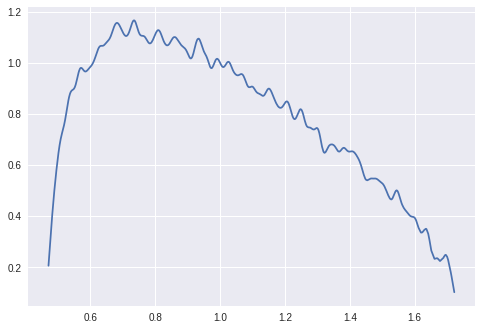

In [8]:
# fitted KDE
pdf1.plot()

## Section 2:
    - Working here with CCs data

In [ ]:
""" 
 ADD SIGNAL
 TO A
 RANDOM COVARIANCE MATRIX
"""
def getRndCov(nCols,nFacts):
    w=np.random.normal(size=(nCols,nFacts))
    cov=np.dot(w,w.T) # random cov matrix, however not full rank
    cov+=np.diag(np.random.uniform(size=nCols)) # full rank cov
    return cov

def cov2corr(cov):
    # Derive the correlation matrix from a covariance matrix
    std=np.sqrt(np.diag(cov))
    corr=cov/np.outer(std,std)
    corr[corr<-1],corr[corr>1]=-1,1 # numerical error
    return corr

# alpha,nCols,nFact,q=.995,1000,100,10
# cov=np.cov(np.random.normal(size=(nCols*q,nCols)),rowvar=0)
# cov=alpha*cov+(1-alpha)*getRndCov(nCols,nFact) # noise+signal
# corr0=cov2corr(cov)
# eVal0,eVec0=getPCA(corr0)


"""
Start with CCs correlation matrix 
"""
eVal0,eVec0=getPCA(corr_mat)
# set q factor
# q = corr_mat.shape[0]/float(corr_mat.shape[1])
q = 2.5

In [21]:
"""
 FITTING
 THE
 MARCENKO–PASTUR PDF
"""
from scipy.optimize import minimize
def errPDFs(var,eVal,q,bWidth,pts=1000):
    # Fit error
    pdf0=mpPDF(var,q,pts) # theoretical pdf
    pdf1=fitKDE(eVal,bWidth,x=pdf0.index.values) # empirical pdf
    sse=np.sum((pdf1-pdf0)**2)
    return sse

def findMaxEval(eVal,q,bWidth):
    # Find max random eVal by fitting Marcenko’s dist
    out=minimize(lambda *x: errPDFs(*x), .5 , args=(eVal,q,bWidth),
                    bounds=((1E-5,1-1E-5),)
                )
    if out['success']:
        var=out['x'][0]
    else:
        var=1
    eMax=var*(1+(1./q)**.5)**2
    return eMax, var

# get bulk of Evalue and Variance
eMax0, var0=findMaxEval(np.diag(eVal0), q, bWidth=.01)
# get nFacts
nFacts0=eVal0.shape[0]-np.diag(eVal0)[::-1].searchsorted(eMax0)


# pdf0=mpPDF(0.5, q=q, pts=1000)
# pdf1=fitKDE(np.diag(eVal0),bWidth=.01,x=pdf0.index.values)

### Number of Facts (my understanding of this is number of Eigenvector which are signals, still unclear though)

In [24]:
# Number of Facts (my understanding of this is number of Eigenvector which are signals, still unclear though)
nFacts0

7

### Variance gives the signal to noise ratio, i.e 1-var0 of variance can be attributed to signal

In [25]:
# variance gives the signal to noise ratio, i.e 1-var0 of variance can be attributed to signal
var0

0.716400738563991

### Bulk of the Eigen Value

In [26]:
eMax0

1.9091442545052024

### plot histogram of E Values

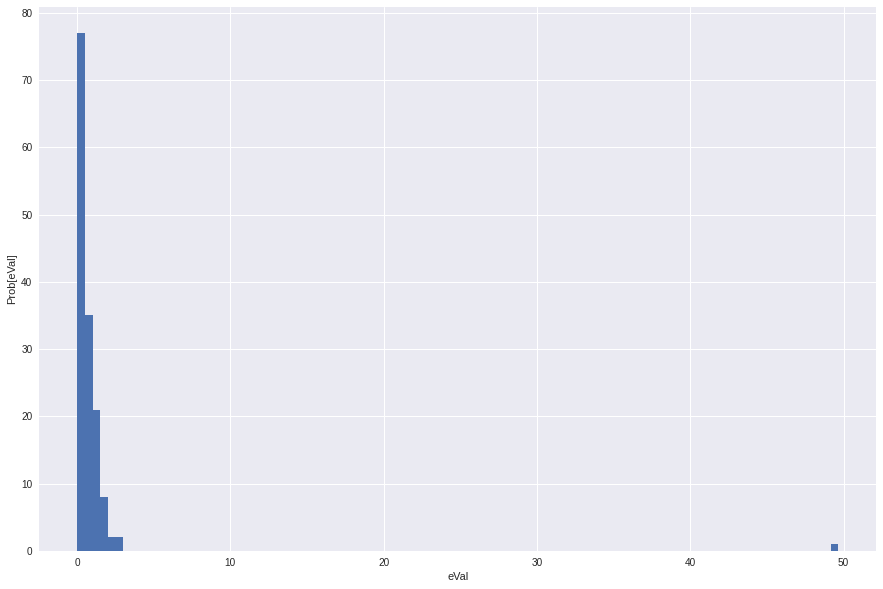

In [28]:
# plot histogram of E Values
plt.figure(figsize=(15,10))
plt.xlabel('eVal')
plt.ylabel('Prob[eVal]')
_ = plt.hist(np.diag(eVal0), bins=100)
# plt.plot(pdf1)

In [29]:
# # plot histogram of E Values
# plt.figure(figsize=(15,10))
# plt.xlabel('eVal')
# plt.ylabel('Prob[eVal]')
# _ = plt.hist(np.diag(eVal0), bins=1000)
# # plt.plot(pdf1)

In [30]:
"""
 SNIPPET 2.5 DENOISING
 BY
 CONSTANT RESIDUAL EIGENVALUE
"""
def denoisedCorr(eVal,eVec,nFacts):
    # Remove noise from corr by fixing random eigenvalues
    eVal_=np.diag(eVal).copy()
    eVal_[nFacts:]=eVal_[nFacts:].sum()/float(eVal_.shape[0]-nFacts)
    eVal_=np.diag(eVal_)
    corr1=np.dot(eVec,eVal_).dot(eVec.T)
    corr1=cov2corr(corr1)
    return corr1

# get denoised correlation matrix
corr1=denoisedCorr(eVal0,eVec0,nFacts0)
eVal1,eVec1=getPCA(corr1)


## Plot the EigenValue on the log scale and compare for denoised matrix vs original matrix

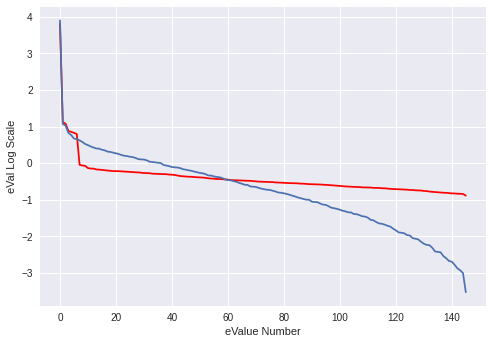

In [31]:
plt.xlabel('eValue Number')
plt.ylabel('eVal Log Scale')
plt.plot(np.log(np.diag(eVal1)),color='red') # denoised evalues
plt.plot(np.log(np.diag(eVal0)))

 - Comments: My understanding here is that after we denoise the matrix the strength of eValues which are geninue signal is preserved as opposed being dilute with noise. Requires further clarrification with the team.

In [32]:
# plt.xlabel('eValue Number')
# plt.ylabel('eVal Log Scale')
# plt.plot(np.log(np.diag(eVal1)),color='red') # denoised evalues
# plt.plot(np.log(np.diag(eVal0)))

## Section 3:
        - Working here with 3 time windows for top 50Ccs

In [39]:
# import data
corr_mat_1st = pd.read_csv('Corr_Top50_1sT_Time_Window.csv').iloc[:, 1:]
corr_mat_2nd = pd.read_csv('Corr_Top50_2nd_Time_Window.csv').iloc[:, 1:]
corr_mat_3rd = pd.read_csv('Corr_Top50_3rd_Time_Window.csv').iloc[:, 1:]

### First Time Window

Number of facts: 1
Variance: 0.99999
Bulk of Evalue: 2.664884414956712


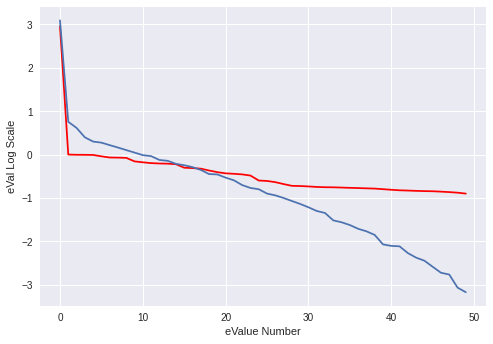

In [50]:
eVal0,eVec0=getPCA(corr_mat_1st)
# set q factor
q = 2.5 # T/N 125/50

# get bulk of Evalue and Variance
eMax0, var0=findMaxEval(np.diag(eVal0), q, bWidth=.01)
# get nFacts
nFacts0=eVal0.shape[0]-np.diag(eVal0)[::-1].searchsorted(eMax0)

print(f'Number of facts: {nFacts0}')
print(f'Variance: {var0}')
print(f'Bulk of Evalue: {eMax0}')

# get denoised correlation matrix
corr1=denoisedCorr(eVal0,eVec0,nFacts0)
eVal1,eVec1=getPCA(corr1)

plt.xlabel('eValue Number')
plt.ylabel('eVal Log Scale')
plt.plot(np.log(np.diag(eVal1)),color='red') # denoised evalues
plt.plot(np.log(np.diag(eVal0)))

 - Comments: Not sure what is happening here but the signal seems to be lost for top 50 CCs here. Could be to do with time period? Although the Q factor remain the same. Worth further discussing with the team.

## Second Time Window

Number of facts: 1
Variance: 0.99999
Bulk of Evalue: 2.664884414956712


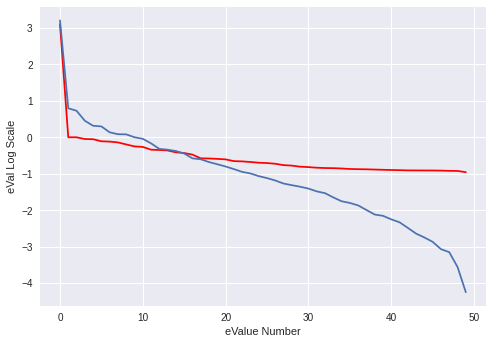

In [47]:
eVal0,eVec0=getPCA(corr_mat_2nd)
# set q factor
q = 2.5 # T/N 125/50

# get bulk of Evalue and Variance
eMax0, var0=findMaxEval(np.diag(eVal0), q, bWidth=.01)
# get nFacts
nFacts0=eVal0.shape[0]-np.diag(eVal0)[::-1].searchsorted(eMax0)

print(f'Number of facts: {nFacts0}')
print(f'Variance: {var0}')
print(f'Bulk of Evalue: {eMax0}')

# get denoised correlation matrix
corr1=denoisedCorr(eVal0,eVec0,nFacts0)
eVal1,eVec1=getPCA(corr1)

plt.xlabel('eValue Number')
plt.ylabel('eVal Log Scale')
plt.plot(np.log(np.diag(eVal1)),color='red') # denoised evalues
plt.plot(np.log(np.diag(eVal0)))

## Third Time Window

Number of facts: 2
Variance: 0.99999
Bulk of Evalue: 2.664884414956712


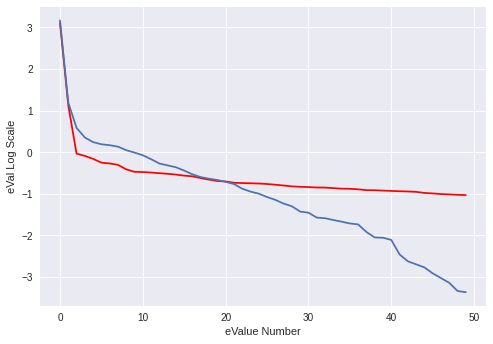

In [48]:
eVal0,eVec0=getPCA(corr_mat_3rd)
# set q factor
q = 2.5 # T/N 125/50

# get bulk of Evalue and Variance
eMax0, var0=findMaxEval(np.diag(eVal0), q, bWidth=.01)
# get nFacts
nFacts0=eVal0.shape[0]-np.diag(eVal0)[::-1].searchsorted(eMax0)

print(f'Number of facts: {nFacts0}')
print(f'Variance: {var0}')
print(f'Bulk of Evalue: {eMax0}')

# get denoised correlation matrix
corr1=denoisedCorr(eVal0,eVec0,nFacts0)
eVal1,eVec1=getPCA(corr1)

plt.xlabel('eValue Number')
plt.ylabel('eVal Log Scale')
plt.plot(np.log(np.diag(eVal1)),color='red') # denoised evalues
plt.plot(np.log(np.diag(eVal0)))